In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_excel("D:\\Masai\\Elevate\\Solo Project\\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
df.shape

(541909, 8)

In [50]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [52]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [53]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [54]:
df.duplicated().sum()

5268

In [55]:
# Removing duplicates
df= df.drop_duplicates()

In [56]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [57]:
df["CustomerID"] = df["CustomerID"].fillna("Unknown")

In [58]:
df = df.dropna()

In [59]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
Q1 = df["UnitPrice"].quantile(.25)
Q3 = df["UnitPrice"].quantile(.75)
IQR =  Q3-Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [61]:
IQR

2.88

In [62]:
lower_bound


-3.0700000000000003

In [63]:
df = df[(df["UnitPrice"] > lower_bound) & (df["UnitPrice"] < upper_bound)]

In [64]:
df['Total sales'] = df['Quantity'] * df['UnitPrice']

In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [66]:
df['UnitPrice'].max()

8.33

<Axes: ylabel='UnitPrice'>

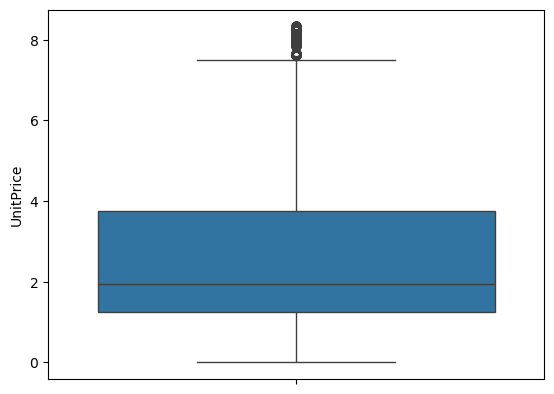

In [67]:
sns.boxplot(data=df["UnitPrice"])

In [68]:
df[df["Quantity"] < 0].value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country         Total sales
537032     21275      ?                                    -30       2010-12-03 16:50:00  0.00       Unknown     United Kingdom  -0.00          1
C566741    23433      HANGING QUILTED PATCHWORK APPLES     -12       2011-09-14 14:55:00  0.83       15618.0     United Kingdom  -9.96          1
C566751    20914      SET/5 RED RETROSPOT LID GLASS BOWLS  -1        2011-09-14 15:42:00  2.95       14911.0     EIRE            -2.95          1
C566749    85053      FRENCH ENAMEL CANDLEHOLDER           -4        2011-09-14 15:38:00  2.10       13999.0     United Kingdom  -8.40          1
           22426      ENAMEL WASH BOWL CREAM               -3        2011-09-14 15:38:00  3.75       13999.0     United Kingdom  -11.25         1
                                                                                                                                 

In [69]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

<Axes: ylabel='Quantity'>

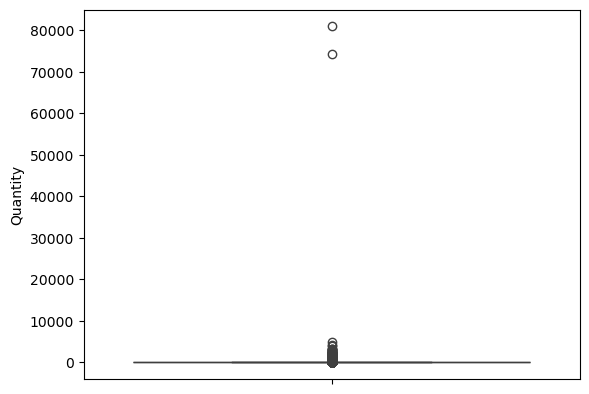

In [70]:
sns.boxplot(data=df["Quantity"])

In [71]:
! pip install sqlalchemy pymysql
! pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [72]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


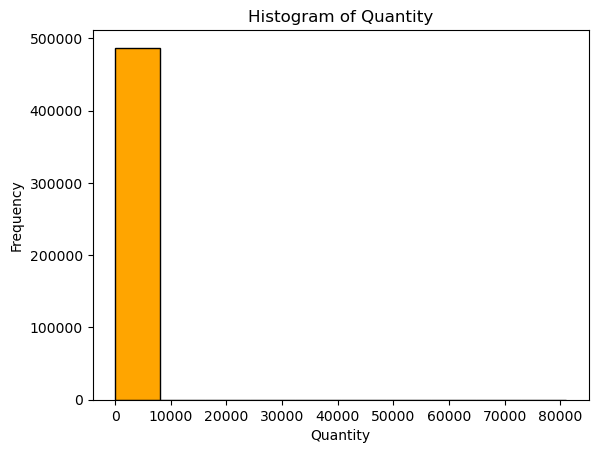

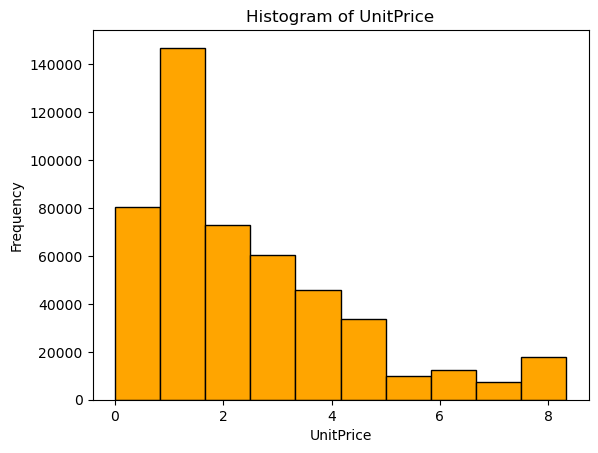

In [73]:
columns = ['Quantity','UnitPrice']

for column in columns:
    df[column].plot(kind='hist', edgecolor='k', color='orange')  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

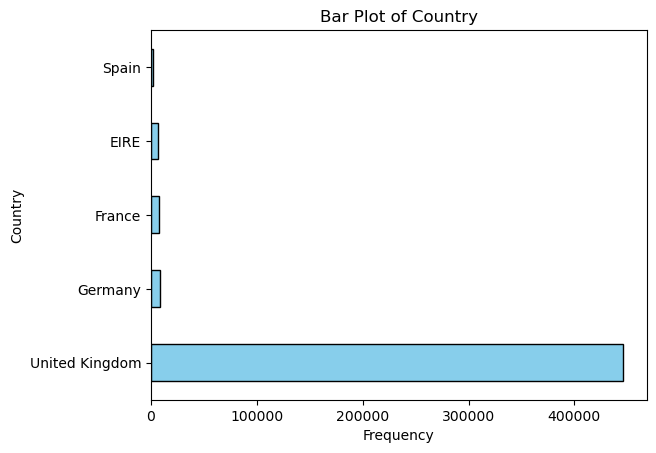

In [74]:
df['Country'].value_counts().head(5).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()


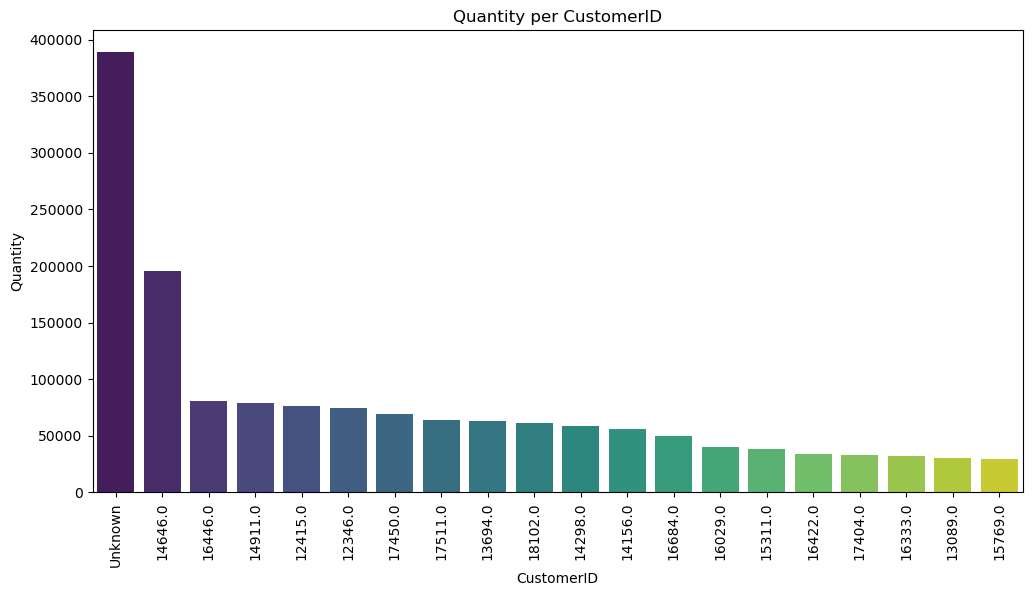

In [75]:
top_CustomerID_quantity = df.groupby('CustomerID')['Quantity'].sum().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_CustomerID_quantity.index, y=top_CustomerID_quantity.values,palette='viridis')
plt.xticks(rotation=90)
plt.title("Quantity per CustomerID")
plt.xlabel("CustomerID")
plt.ylabel("Quantity")
plt.show()

In [76]:
from sqlalchemy import create_engine
import urllib.parse

# MySQL database credentials
username = "root"
password = urllib.parse.quote_plus("root")  # URL-encode the password
host = "127.0.0.1"       # Use "127.0.0.1" or "localhost"
port = "3306"            # MySQL default port
database_name = "ProjectDB"

# Create the SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database_name}")

# Test the connection
try:
    conn = engine.connect()
    print("Connection successful!")
    conn.close()
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful!


In [79]:
#Upload dataframe to mysql table
df.to_sql('Ecommerce_',con=engine, if_exists = 'replace', index=False)

-1

In [80]:
df.to_csv("Ecommerce.csv",index=False)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487051 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    487051 non-null  object        
 1   StockCode    487051 non-null  object        
 2   Description  487051 non-null  object        
 3   Quantity     487051 non-null  int64         
 4   InvoiceDate  487051 non-null  datetime64[ns]
 5   UnitPrice    487051 non-null  float64       
 6   CustomerID   487051 non-null  object        
 7   Country      487051 non-null  object        
 8   Total sales  487051 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB
